# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
with open(r'\Users\pmaxl\Resources\api_keys.py') as apikey:
    mykey=apikey.read()
    mykey=mykey.split('"')
     
api_key = mykey[3]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

#create empty list to add json's to
weather_json = []
#set ind to -1 so the first index correctly prints out as 0
ind=-1

#iterate to retreive all the relavent json objects
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city
        response = requests.get(query_url)
        response_json = response.json()
        weather_json.append(response_json)
        ind=ind+1
        print(f'#{ind} {city} data appended to list!')
    except:
        print(f'{city} not found...')
    

#0 manzhouli data appended to list!
#1 karkaralinsk data appended to list!
#2 maragogi data appended to list!
#3 ponta do sol data appended to list!
#4 albany data appended to list!
#5 kodiak data appended to list!
#6 sentyabrskiy data appended to list!
#7 lillehammer data appended to list!
#8 illoqqortoormiut data appended to list!
#9 havelock data appended to list!
#10 kunszentmiklos data appended to list!
#11 hobart data appended to list!
#12 cape town data appended to list!
#13 rikitea data appended to list!
#14 port lincoln data appended to list!
#15 port macquarie data appended to list!
#16 jamestown data appended to list!
#17 qaqortoq data appended to list!
#18 hermanus data appended to list!
#19 along data appended to list!
#20 punta arenas data appended to list!
#21 longyearbyen data appended to list!
#22 gamba data appended to list!
#23 kutum data appended to list!
#24 mataura data appended to list!
#25 aksu data appended to list!
#26 singuilucan data appended to list!
#27 al

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create dictionary to set up dataframe
data = {'City': [],
        'Country': [],
        'Lat': [],
        'Lng': [],
        'Max Temp': [],
        'Humidity': [],
        'Cloudiness': [],
        'Wind Speed': [],
        'Country': [],
        'Date': [],
       }
na_cities=[]

#iterate over the json to assign values to the data dictionary
for x in range(len(weather_json)):
    
    
    try:

        data['City'].append(weather_json[x]['name'])

        data['Country'].append(weather_json[x]['sys']['country'])
    
        data['Lat'].append(weather_json[x]['coord']['lat'])

        data['Lng'].append(weather_json[x]['coord']['lon'])

        data['Max Temp'].append(weather_json[x]['main']['temp_max'])

        data['Humidity'].append(weather_json[x]['main']['humidity'])

        data['Cloudiness'].append(weather_json[x]['clouds']['all'])

        data['Wind Speed'].append(weather_json[x]['wind']['speed'])

        data['Date'].append(weather_json[x]['dt'])
    
    
    except:
        na_cities.append(x)


print(f'Insufficient data for {len(na_cities)} cities')



#create dataframe    
weather_df = pd.DataFrame(data)
weather_df =weather_df[weather_df["City"] != 'nan']
weather_df.reset_index(drop=True)

weather_df.to_csv(r'C:\Users\pmaxl\OneDrive\Desktop\BootCamp\Homework\python_api_challenge\weather_data.csv', index = False)
weather_df.head(15)


Insufficient data for 48 cities


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Manzhouli,CN,49.60,117.43,266.16,93,0,2.67,1605397354
1,Maragogi,BR,-9.01,-35.22,298.63,83,2,5.07,1605397323
2,Ponta do Sol,PT,32.67,-17.10,295.15,88,75,3.10,1605397355
3,Albany,US,42.60,-73.97,279.26,63,12,3.88,1605397355
4,Saint Paul Harbor,US,57.79,-152.41,276.15,51,20,3.60,1605397355
5,Lillehammer,NO,61.11,10.47,277.04,90,100,2.25,1605397355
6,Havelock,US,34.88,-76.90,288.15,82,1,1.50,1605397209
7,Kunszentmiklós,HU,47.03,19.13,281.15,87,90,2.10,1605397356
8,Hobart,AU,-42.88,147.33,290.37,51,75,5.10,1605397172
9,Cape Town,ZA,-33.93,18.42,288.15,82,20,4.60,1605396643


In [6]:
#read in newly created csv
wdf=pd.read_csv('C:\\Users\\pmaxl\\OneDrive\\Desktop\\BootCamp\\Homework\\python_api_challenge\\weather_data.csv')
wdf_summary=wdf.describe()
wdf_summary

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.370377,17.128600,286.663968,74.852783,51.053860,3.716625,1.605397e+09
std,33.054818,89.415082,13.598414,19.108923,38.812925,2.739276,7.859004e+01
min,-54.800000,-175.200000,241.560000,1.000000,0.000000,0.100000,1.605397e+09
25%,-8.010000,-59.520000,277.150000,66.000000,8.000000,1.730000,1.605397e+09
50%,24.340000,20.800000,290.370000,79.000000,53.000000,3.000000,1.605397e+09
75%,47.870000,96.130000,298.150000,88.000000,90.000000,5.070000,1.605397e+09
max,78.220000,179.320000,307.150000,100.000000,100.000000,15.900000,1.605397e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

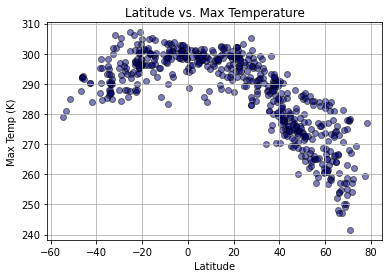

In [7]:
#set x and y 
x1=wdf['Lat']
y1=wdf['Max Temp']

#add x and y to plot
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()

#create labels for plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp (K)")
plt.title("Latitude vs. Max Temperature")
plt.show()

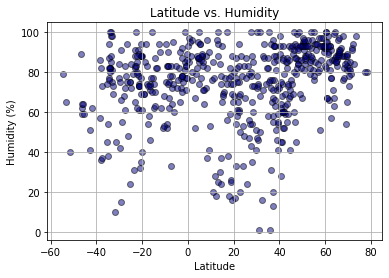

In [8]:
#set x and y
x1=wdf['Lat']
y1=wdf['Humidity']

#add x and y to a scatter plot
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()

#add labels to the figure
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

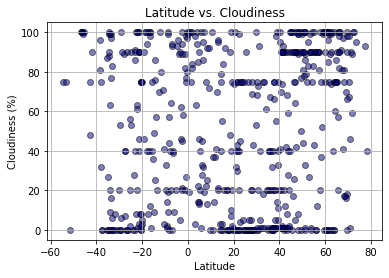

In [9]:
#set x and y
x1=wdf['Lat']
y1=wdf['Cloudiness']

#add x and y to the scatter plot
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()

#add labels to the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

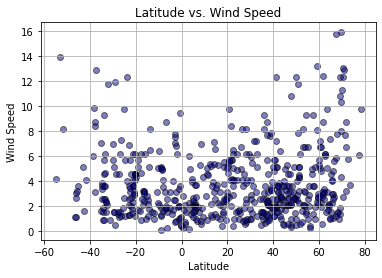

In [10]:
#set x and y
x1=wdf['Lat']
y1=wdf['Wind Speed']

#add x and y to a scatter plot
plt.scatter(x1, y1, color='navy', alpha=.5, edgecolors='k')
plt.grid()

#add labels to the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r= -0.8508329659854977
y= -0.6x + 305.88


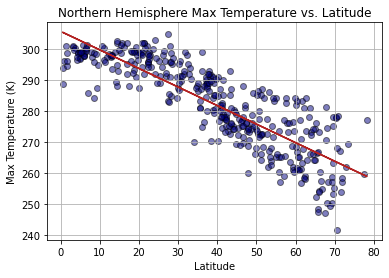

In [11]:
#create dataframe that includes only cities in the northern hemisphere
nh_weather=wdf[wdf['Lat']>0]

#set x and y
x=nh_weather['Lat']
y=nh_weather['Max Temp']

#set up linear regression variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Max Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid()

#print r and the equation for the linear regression line
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r= 0.5686577085024542
y= 0.25x + 301.33


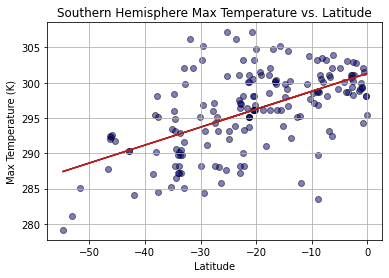

In [12]:
#create dataframe with only the cities in the southern hemisphere
sh_weather=wdf[wdf['Lat']<0]

#set x and y
x=sh_weather['Lat']
y=sh_weather['Max Temp']

#set up linear regression variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Max Temperature vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid()

#print r value and the line equation
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r= 0.2993163753347619
y= 0.3x + 64.0


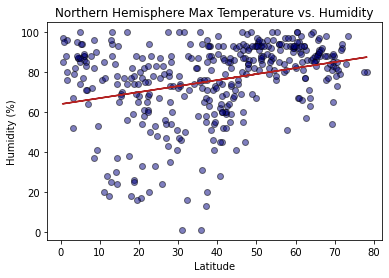

In [13]:
#set x and y
x=nh_weather['Lat']
y=nh_weather['Humidity']

#set up linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Max Temperature vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid

#print r and line equation
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r= 0.21386688353898464
y= 0.28x + 78.73


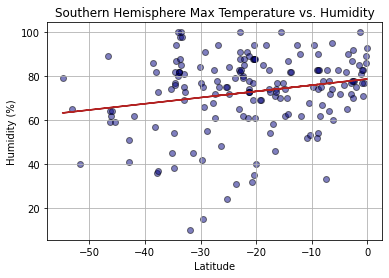

In [14]:
#set x and y
x=sh_weather['Lat']
y=sh_weather['Humidity']

#set up linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Max Temperature vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

#print r and line equation
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r= 0.2611892906138181
y= 0.52x + 30.68


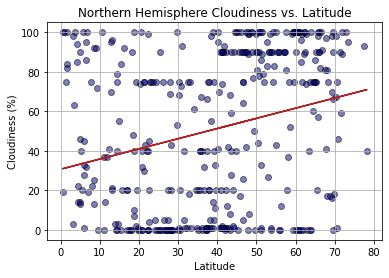

In [15]:
#set x and y
x=nh_weather['Lat']
y=nh_weather['Cloudiness']

#set up linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#print r and line equation
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r= 0.02487497363963907
y= 0.07x + 53.13


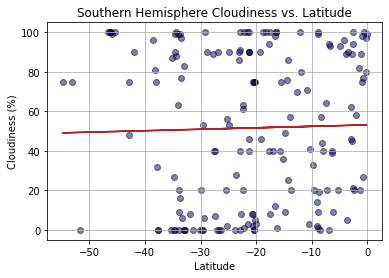

In [16]:
#set x and y
x=sh_weather['Lat']
y=sh_weather['Cloudiness']

#set up linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

#print r and line equation
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r= 0.2658982168287629
y= 0.04x + 2.26


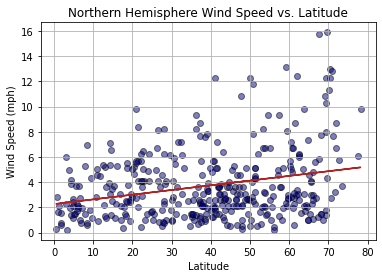

In [17]:
#set x and y
x=nh_weather['Lat']
y=nh_weather['Wind Speed']

#set linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Northern Hemisphere Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#print r and line equation
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r= -0.21575498868746187
y= -0.04x + 2.79


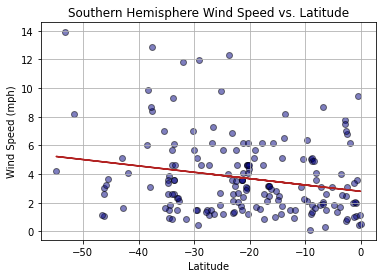

In [18]:
#set x and y values
x=sh_weather['Lat']
y=sh_weather['Wind Speed']

#set up linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

#set up plot with linear regression
regress_values = x * slope + intercept
plt.scatter(x,y, color='navy', alpha=.5, edgecolors='k')
plt.plot(x,regress_values, "r-", color= "firebrick")
plt.title("Southern Hemisphere Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

#printr and line equation
print(f'r= {rvalue}')
print(f'y= {round(slope, 2)}x + {round(intercept, 2)}')
plt.show()